In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.cluster import k_means
from sklearn.cluster import *


In [2]:
df = pd.DataFrame(columns=('name', 't', 'p'))

In [119]:
df.loc[0] = ['im1',1,2]
df.loc[1] = ['im2',1,1]
df.loc[2] = ['im3',1,1]
df.loc[3] = ['im4',2,1]
df.loc[4] = ['im5',2,1]
df.loc[5] = ['im6',2,2]
df.loc[6] = ['im7',0,3]
df.loc[7] = ['im8',0,0]
df.loc[8] = ['im9',2,2]
df.loc[9] = ['im10',2,2]
df.loc[10] = ['im11',2,2]

df.loc[11] = ['im12',3,0]
df.loc[12] = ['im13',3,0]
df.loc[13] = ['im14',3,3]
df.loc[14] = ['im15',3,3]
df.loc[15] = ['im16',3,3]



In [120]:
def softmax(ftr):
    print('compute softmax probabilities')
    num, dim = ftr.shape[0], ftr.shape[1]
    print('num %d dim %d' % (num, dim))
    prob = np.zeros((num, dim), dtype=np.single)
    for i in range(num):
        max_val = np.max(ftr[i, :])
        row = ftr[i, :] - max_val
        exp_val = np.exp(row)
        prob[i, :] = exp_val / np.sum(exp_val)
    return prob 

In [121]:
num_classes = 4
num_values = 16
root = '/Users/shreya/Desktop/UCLA/Google-Landmark-Recognition'

conf_mat = np.zeros((num_classes,num_classes))


In [122]:
conf_mat[0][0]

0.0

In [123]:
'''
Hardcoding 100-class probabilities for validation images .
'''
class_prob = [2/15,3/15,6/15,4/15]



val_prob = np.zeros((num_values,num_classes))

for i in range(num_values):
    for j in range(num_classes):
        
        val_prob[i][j]=class_prob[j]
val_prob=softmax(val_prob)
print(val_prob)



compute softmax probabilities
num 16 dim 4
[[0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]
 [0.2213773  0.23663884 0.28903133 0.25295252]]


In [124]:
for i in range(df.count()['name']):
    t = df.loc[i]['t']
    p = df.loc[i]['p']
    #print(conf_mat)
    conf_mat[t][p] =     conf_mat[t][p] +1
    #print(conf_mat)
for i in range(num_classes):
    conf_mat[i] = conf_mat[i]/sum(conf_mat[i])


[[0.5        0.         0.         0.5       ]
 [0.         0.66666667 0.33333333 0.        ]
 [0.         0.33333333 0.66666667 0.        ]
 [0.4        0.         0.         0.6       ]]


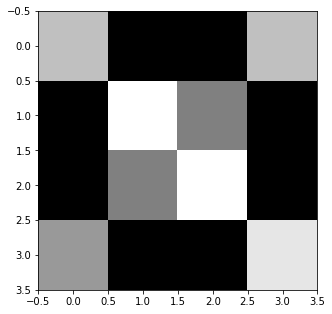

In [125]:
print(conf_mat)
plt.imshow(conf_mat)

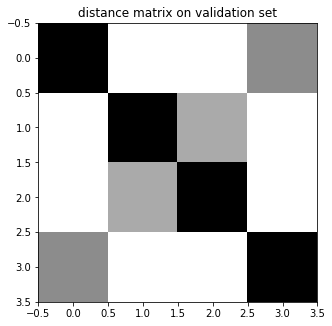

In [126]:
dist_mat = 1 - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

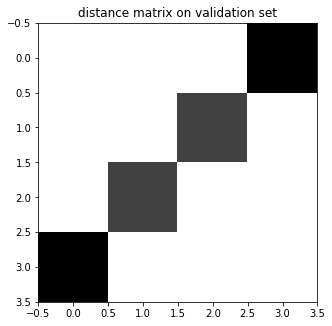

In [127]:
I = np.identity(num_classes)
dist_mat = I - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

[0.5 0.5 0.5 0.5]


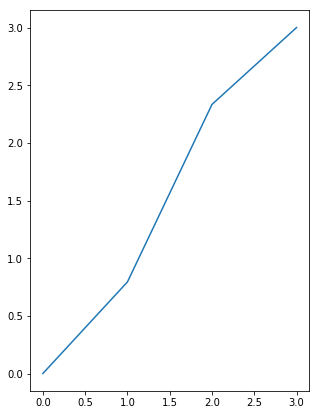

In [128]:
W=np.zeros((num_classes,num_classes))

k_nn, t, dim = 2, 0.9, 4

for i in range(num_classes):
    idx=np.argsort(dist_mat[i,:])[1:k_nn+1]
    W[i,idx]=np.exp(-dist_mat[i,idx] / t)
    W[idx,i]=W[i,idx]
D=np.zeros(W.shape)
for i in range(num_classes):
    D[i,i]=np.sum(W[i,:])
L=D-W
eig_val,eig_vec=scipy.linalg.eig(L,D)
ftr=eig_vec[:,1:dim+1]
print(eig_vec[:,0]) # the 1st eigenvector should be all ones
eigval_cumsum = np.cumsum(np.real(eig_val))
plt.plot(eigval_cumsum)

In [129]:
affinity_propagation_cluster = AffinityPropagation(damping=0.75, max_iter=15000, convergence_iter=50, copy=True) 
cluster_labels = affinity_propagation_cluster.fit_predict(ftr)
unique_cluster_label = np.unique(cluster_labels)
n_cluster = unique_cluster_label.shape[0]
cluster_members=[None]*n_cluster
print ('%d clusters' % n_cluster)

2 clusters


In [130]:
label_names=range(4)
for i in range(n_cluster):
    idx = np.nonzero(cluster_labels == unique_cluster_label[i])[0]
    cluster_members[i]=list(idx)
    print ('cluster %d size %d ' % (i, len(idx)))
    for j in range(len(idx)):
        print ('%s,' % label_names[idx[j]],)
    print (' ')
print(cluster_members)

cluster 0 size 3 
0,
1,
2,
 
cluster 1 size 1 
3,
 
[[0, 1, 2], [3]]


In [131]:
''' compute a  histogram of the percentage of images 
that are classified as a label in the same cluster of its groundtruth label
'''
def plot_cluster_coverage(num_class, cluster_mbs,confusion_mat):
    cluster_coverage=np.zeros((num_class))
    for i in range(len(cluster_mbs)):
        for j in range(len(cluster_mbs[i])):
            class_id=cluster_mbs[i][j]
# TODO  Shreya : Not very sure whether this must be multiplied back
            cluster_coverage[class_id]=np.sum(confusion_mat[class_id,cluster_mbs[i]])
    print(cluster_coverage)
    n, bins, patches=plt.hist(cluster_coverage,bins=20)
    
def read_text(fn):
    text=[]
    f=open(fn)
    for line in f:
        text+=[line]
    f.close()
    return text

def write_text(fn,text):
    f=open(fn,'w')
    f.writelines(text)
    f.close()
    
def find_layer_id(lay_names,lay_name):
    for i in range(len(lay_names)):
        if lay_names[i]==lay_name:
            return i
    return -1



total_member 8
[[0, 1, 2, 3], [3, 2, 1, 0]]


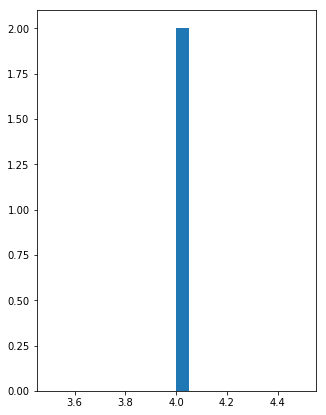

In [132]:
''' Adding extra classes to each branch to compensate for coarse misclassification at gating part
For each branch, sort all classes out of branch based on likelihood that they're misclassified into the branch
Take the top ones and also limit the total number of classes within each branch
'''

exp_cluster_members=[None]*n_cluster
if 1:
    all_mb=range(num_classes)
    # for 9 clusters v0.0
    gamma=5.0
    score_thres=1.0/(gamma*n_cluster)
    
    
    max_exp_clu_size=80
    extra_cluster_members=[None]*n_cluster

    for i in range(n_cluster):
        non_member = np.asarray(np.setdiff1d(range(num_class),cluster_members[i]))
    #     print non_member.shape
        score=np.zeros((non_member.shape[0]))
        for j in range(non_member.shape[0]):
            idx=np.nonzero(df['t']==non_member[j])[0]
            lc_prob=val_prob[idx,:][:,cluster_members[i]]
            score[j]=np.mean(np.sum(lc_prob,axis=1))
        score_sorted=np.sort(score)[::-1]
        idx_sort=np.argsort(score)[::-1]
        idx2=np.nonzero(score_sorted>=score_thres)[0]
        if len(idx2)+len(cluster_members[i])> max_exp_clu_size:
            idx2=idx2[:(max_exp_clu_size-len(cluster_members[i]))]
        extra_cluster_members[i]=[non_member[idx_sort[id]] for id in idx2]
        exp_cluster_members[i]=cluster_members[i]+extra_cluster_members[i]
        assert len(exp_cluster_members[i])==np.unique(np.asarray(exp_cluster_members[i])).shape[0]
else:
    '''disjoint coarse category'''
    for i in range(n_cluster):
        exp_cluster_members[i]=cluster_members[i]
        
total_member=sum([len(cluster) for cluster in exp_cluster_members])
print('total_member %d' % total_member)
plt.hist([len(cluster) for cluster in exp_cluster_members],bins=20)

print(exp_cluster_members)
    

[0.5 1.5]


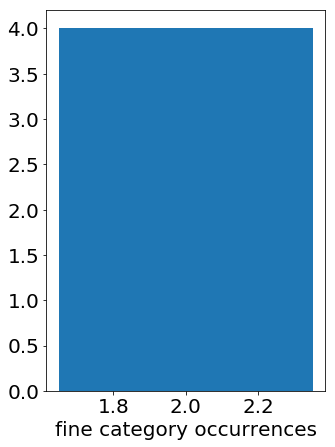

In [133]:
plt.rcParams['figure.figsize'] = (5, 7)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

fine_category_occurrence=np.zeros((num_classes),dtype=np.int32)
for i, exp_cluster_member in enumerate(exp_cluster_members):
    for j in range(len(exp_cluster_member)):
        fine_category_occurrence[exp_cluster_member[j]]+=1
n, bins, patches=plt.hist(fine_category_occurrence,bins=np.arange(0,np.max(fine_category_occurrence),1)+1.5,rwidth=0.7,histtype='bar')
print(np.arange(0,np.max(fine_category_occurrence),1)+0.5)
# plt.ylabel('fine category occurrence')
plt.xlabel('fine category occurrences',fontsize=20)
# plt.ylabel('count',fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=20)

In [134]:
print(num_class)
fine2multicoarse=[None]*num_class
for i in range(num_class):
    fine2multicoarse[i]=[]
for i in range(len(exp_cluster_members)):
    for j in range(len(exp_cluster_members[i])):
        fine2multicoarse[exp_cluster_members[i][j]] += [i]

4


[0.5 1.  1.  0.6]
[[0, 1, 2], [3]] 4


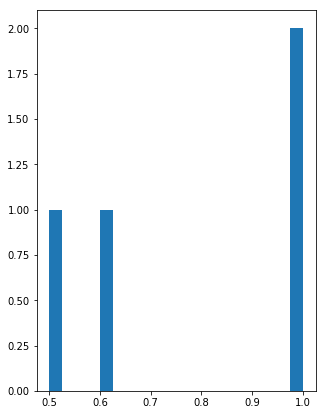

In [135]:


plot_cluster_coverage(num_class,cluster_members,conf_mat)
print(cluster_members,num_class)

[1. 1. 1. 1.]
[[0, 1, 2, 3], [3, 2, 1, 0]] 4


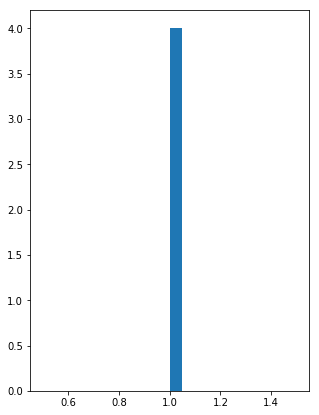

In [136]:
plot_cluster_coverage(num_class,exp_cluster_members,conf_mat)
print(exp_cluster_members,num_class)

In [137]:
version ='v0.0'
label_2_clusterid = np.zeros((num_classes))
for i in range(n_cluster):
    print('cluster %d size %d' %(i, len(cluster_members[i])))
    for j in range(len(cluster_members[i])):
        label_2_clusterid[cluster_members[i][j]] = i

label_2_clusterid_file = root + 'label_2_clusterID.txt' 

f=open(label_2_clusterid_file,'w')
for i in range(num_classes):
    f.write('%d\n' % label_2_clusterid[i])
f.close()

cluster 0 size 3
cluster 1 size 1


In [ ]:
'''
read 100-class probabilities for testing images from leveldb
'''
